In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}


In [3]:
#pandas config
pd.options.display.max_colwidth = 400

In [4]:
df = pd.read_csv('query_(to:dilmabr).csv')

In [5]:
#convert to datetime columns
df['date']=pd.to_datetime(df['date'])

# create additional date time columns
df['created_at_r']=df['date'].dt.strftime('%Y-%m-%d %H')
df['created_at_r2']=df['date'].dt.strftime('%m-%d')

In [6]:
#count tweets by day
count_tweets_day = df['created_at_r2'].value_counts().sort_index()
#count tweets by hour
count_tweets_hour = df['created_at_r'].value_counts().sort_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


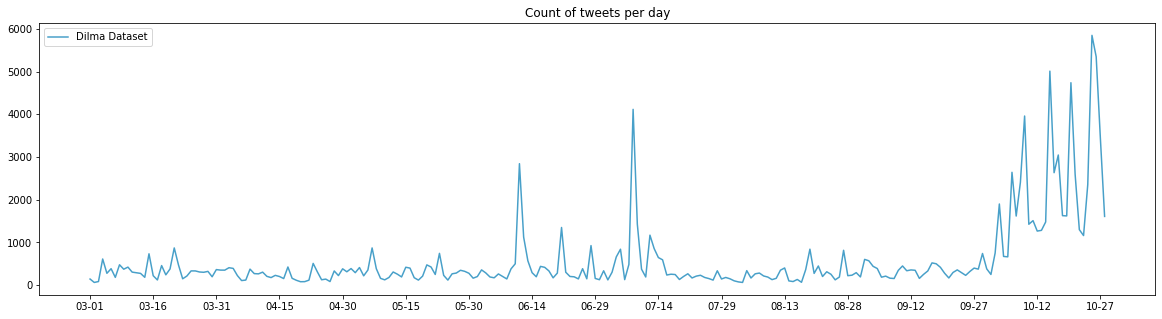

In [7]:
#per day
plt.figure(figsize=(20,5))
p6=sns.lineplot(count_tweets_day.index, count_tweets_day.values, color=barcolors[3], label='Dilma Dataset')
p6.set_title('Count of tweets per day')
p6.set_xticks(range(0, len(count_tweets_day.index), 15))
#p6.set_xticklabels(df['date'].dt.strftime('%m').unique().sort().tolist())
#p6.set_yscale('log')
plt.show()

In [8]:
#tweets datail info
tweet_count_day_mean = df['created_at_r2'].value_counts().mean()
tweet_count_hour_mean = df['created_at_r'].value_counts().mean()

print(f'Mean of tweets per hour: {round(tweet_count_hour_mean, 1)}')
print(f'Mean of tweets per day: {round(tweet_count_day_mean, 1)}')
print(f'Total of tweets: {df.shape[0]}')

Mean of tweets per hour: 25.9
Mean of tweets per day: 570.8
Total of tweets: 138133


In [22]:
labels = sorted(df['date'].dt.strftime('%m').unique().tolist())
labels

['03', '04', '05', '06', '07', '08', '09', '10']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


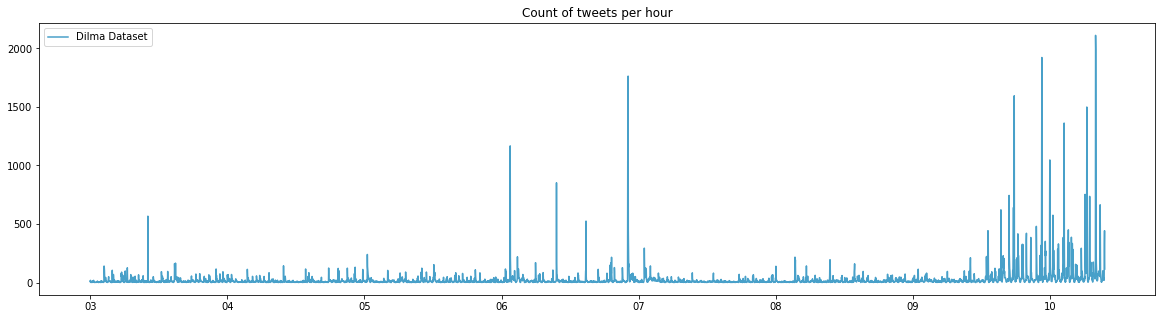

In [23]:
#by hour
plt.figure(figsize=(20,5))
p6=sns.lineplot(count_tweets_hour.index, count_tweets_hour.values, color=barcolors[3], label='Dilma Dataset')
p6.set_title('Count of tweets per hour')
p6.set_xticks(range(0, len(count_tweets_hour.index), 720))
p6.set_xticklabels(labels)
#p6.set_yscale('log')
plt.show()